In [13]:
import os

path, dirs, files = next(os.walk('train'))

print("There is")
print(len(files))
print("files")

There is
25000
files


In [14]:
file_names = os.listdir('train')[:2000]
print(file_names[0])

dog.8011.jpg


In [15]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

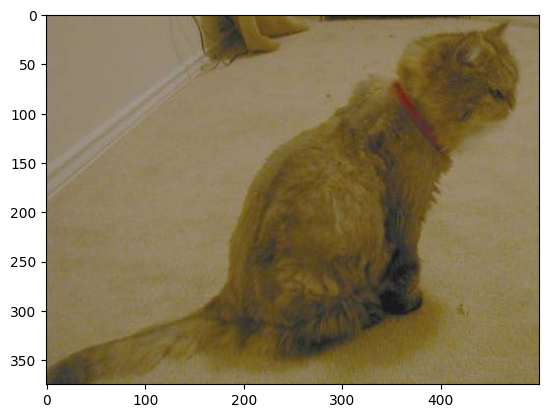

In [16]:
cat = mpimg.imread('train/cat.10145.jpg')
plt.imshow(cat)
plt.show()

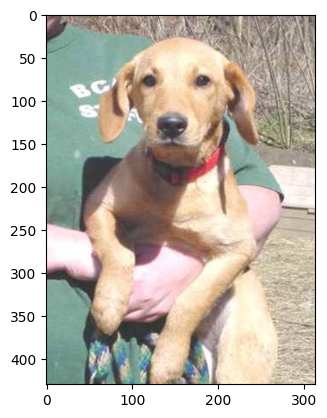

In [17]:
dog = mpimg.imread('train/dog.10145.jpg')
plt.imshow(dog)
plt.show()

In [18]:
dog_files = []
cat_files = []

labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)
        labels.append(0)
    elif file_name.startswith('dog'):
        dog_files.append(file_name)
        labels.append(1)

print(len(dog_files))
print(len(cat_files))

1014
986


In [19]:
import PIL

for file_name in file_names:
    img = PIL.Image.open('train/' + file_name)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    img.save('resized/' + file_name)

In [20]:
import cv2
import glob
import numpy as np


dog_cat_images= []


for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))


dog_cat_images = np.asarray(dog_cat_images)

In [21]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_Test, Y_Train, Y_test = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_Test/255

In [22]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [23]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)


model.fit(X_train_scaled, Y_Train, epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 10s 156ms/step - loss: 0.2004 - acc: 0.9275
Epoch 2/5
50/50 [==============================] - 8s 157ms/step - loss: 0.0686 - acc: 0.9806
Epoch 3/5
50/50 [==============================] - 8s 156ms/step - loss: 0.0555 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 8s 155ms/step - loss: 0.0398 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 8s 155ms

666


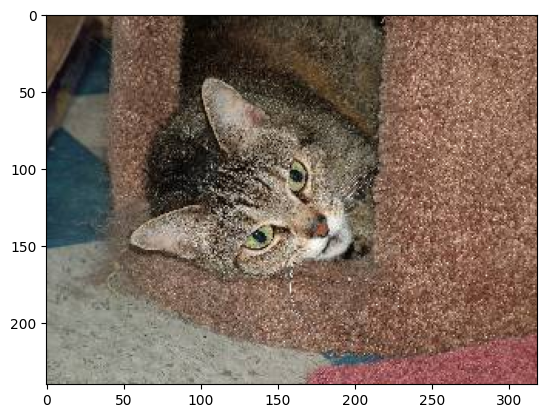

In [25]:
user_image = input(" Give me a number between 1 and 12500")

print(user_image)

test = mpimg.imread('test1/' + user_image + '.jpg')
plt.imshow(test)
plt.show()

In [27]:
input_image = cv2.imread(f'test1/' + user_image + '.jpg')

input_image_resize = cv2.resize(input_image,  (244,244))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,234,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

ValueError: cannot reshape array of size 178608 into shape (1,224,234,3)